# Compare two function, which ploting topomaps with min and max value of signal     
   
Here we use methods for plotting topomaps, which differ in the order of data averaging

In [1]:
import mne
import os.path as op
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import copy
import pandas as pd
import statsmodels.stats.multitest as mul

# Var 1. 

first, we average data between subjects, then we look for extrems

In [2]:
# We get an array with data, averaged over the subjects

def average_data_per_sensor(subjects, data_path, planar, tmin, tmax):
    #Make list of evoked
    all_evoked = []
    for subj in subjects:
        data = op.join(data_path, planar.format(subj)) #If you need to make combine planar for beta, please use the combine_planar.py
        evk = mne.Evoked(data)
        all_evoked.append(evk)

    ###### SHIFT TIME #######
    
    #shift time scale if it is needed. Comment if you don't need
    
    #for i in all_evoked:
    #    i.shift_time(-2.0, relative=False)
        
        ##############
        
    interval = []
    
    for i in all_evoked:
        x = i.crop(tmin=tmin, tmax=tmax)   #crop - mne function

        interval.append(x.data)
        
    donor = all_evoked[0].crop(tmin=tmin, tmax=tmax) #any evoked
        
    amplitude = np.array(interval)
    
    mean_amp = np.mean(amplitude.data, axis = 0)
    
    donor.data = mean_amp
    
    return (donor)

In [3]:
# Finding extremes

def extremum_value_and_index(evoked):

    max_beta_index_list = []
    max_beta_list = []

    min_beta_index_list = []
    min_beta_list = []

    for i in range(len(evoked.data)):
        s = evoked.data[i] # point from one sensor, number i

        #MAXIMUM
        max_beta = np.amax(s, axis = 0) # max beta value on i sensor
        max_beta_list.append(max_beta)

        max_beta_ind = np.argmax(s, axis = 0) # index of max beta value on i sensor
        max_beta_index_list.append(max_beta_ind)

        #MINIMUM
        min_beta = np.amin(s, axis = 0) # min beta value on i sensor
        min_beta_list.append(min_beta)

        min_beta_ind = np.argmin(s, axis = 0) # index of max beta value on i sensor
        min_beta_index_list.append(min_beta_ind)
        
        #return lists of maximal and minimal values for each sensors and lists of indexes for this values
    return(min_beta_list, min_beta_index_list, max_beta_list, max_beta_index_list)

# Example

In [4]:
data_path = '/home/vtretyakova/Desktop/self_pace_new_exp_15_30/self_pace_day1_comb_15_30_Db'
planar = "{0}_beta_comb_15_30-Db.fif"

subjects = []
for i in range(1,29):
    if i < 10:
        subjects += ['L00' + str(i)]
    else:
        subjects += ['L0' + str(i)]
        

        
tmin = -1.0
tmax = 1.4


ave_beta = average_data_per_sensor(subjects, data_path, planar, tmin, tmax)   

    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method sel

In [5]:
min_beta_list, min_beta_index_list, max_beta_list, max_beta_index_list = extremum_value_and_index(ave_beta)

In [6]:
# Plotting topomaps for minimums and maximums

def plot_topomaps_min (min_beta_list, units, vmin, vmax, scalings = 1):
    min_beta_array = np.array(min_beta_list) # make from list np.array
    
    # reshape array to plot topomaps
    min_array = min_beta_array.reshape(102, 1)
    
    #load donor
    # At the end we will replace all parametr for the donor with the one we need
    donor = mne.Evoked("/home/vtretyakova/Public/passive_new /ttest_topomaps/topomaps_ttest_Sasha_Nikita/MNE_TFR_ToolBox-master_Nikita/VISUALISATION/donor-ave.fif")
    donor.times = np.arange(0, 2.01, 1)
    
    # Using the donor , we make Evoked from resulting array
    evk_min = mne.EvokedArray(min_array, donor.info)
    
    #plot topomaps
    t = np.linspace(0, 0, num=1) 
    
    fig_min = evk_min.plot_topomap(times = t, ch_type='planar1', scalings = scalings, units = units,
                                   show = False, colorbar = True, vmin = vmin, vmax = vmax) 

    return (fig_min)


def plot_topomaps_max (max_beta_list, units, vmin, vmax, scalings = 1):
    max_beta_array = np.array(max_beta_list)
    max_array = max_beta_array.reshape(102, 1)
    
    #load donor
    # At the end we will replace all parametr for the donor with the one we need
    donor = mne.Evoked("/home/vtretyakova/Public/passive_new /ttest_topomaps/topomaps_ttest_Sasha_Nikita/MNE_TFR_ToolBox-master_Nikita/VISUALISATION/donor-ave.fif")
    donor.times = np.arange(0, 2.01, 1)
    evk_max = mne.EvokedArray(max_array, donor.info)
    
    #plot topomaps
    t = np.linspace(0, 0, num=1) 
    
    fig_max = evk_max.plot_topomap(times = t, ch_type='planar1', scalings = 1, units = units,
                                       show = False, colorbar = True, vmin = vmin, vmax = vmax)
    
    
    return (fig_max)
    

    Found the data of interest:
        t =    -610.00 ...     600.00 ms (hicha)
        0 CTF compensation matrices available
        nave = 50 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =    -610.00 ...     600.00 ms (hicha)
        0 CTF compensation matrices available
        nave = 50 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.


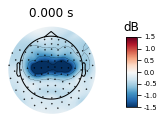

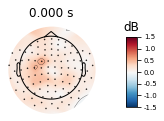

In [7]:
fig_min = plot_topomaps_min(min_beta_list, scalings = 1, units = "dB", vmin = -1.5, vmax = 1.5)
fig_max = plot_topomaps_max(max_beta_list, scalings = 1, units = "dB", vmin = -1.5, vmax = 1.5)

# Var. 2


first, we look for extrems for each subjects, then we average obtained extrems values

In [8]:
# We get an array with data for each subjects, and each sensor

############ MINIMUM ###############

def min_beta_and_time_for_min(subjects, data_path, planar, tmin, tmax): 
#Make list of evoked
    all_evoked = []
    for subj in subjects:
        data = op.join(data_path, planar.format(subj)) #If you need to make combine planar for beta, please use the combine_planar.py
        evk = mne.Evoked(data)
        all_evoked.append(evk)

    #shift time scale if it is needed
    #what the hell is going on here????????
    #for i in all_evoked:
    #   i.shift_time(-2.0, relative=False)

# calculate average data for interval. You have to choose interval - downward, upward or susteined (look at the beggining of script)
    interval = []
    
    for i in all_evoked:
        x = i.crop(tmin=tmin, tmax=tmax)   #crop - mne function
        interval.append(x)
        
        # x = list of Evoked

    min_beta = []
    index_min_beta = []    #for searching of time point of min beta on sensor
    for i in interval:
        m = np.min(i.data, axis = 1)
        t = np.argmin(i.data, axis = 1) #indexes of min
        a = m.tolist()
        b = t.tolist()

        min_beta.append(a)
        index_min_beta.append(b)
    
    # search time of beta minimum
    time = []
    for i in range(len(index_min_beta)):
        time_per_subj = [] # 102 time point for every sensors
        for j in index_min_beta[i]:
            # find time between time points
            #interval[0].data.shape[1] - amount of points on interval
            # j - index of extremum point
            time_between_points = (tmin - tmax)/(interval[0].data.shape[1]-1)
            t = tmin - time_between_points*j
            time_per_subj.append(t)
        time.append(time_per_subj)

    #make np.array from list
    min_interval_array = np.array(min_beta)
    min_time_array = np.array(time)
    
    return(min_interval_array, min_time_array) 
#return array 102x28, e.g. sets power of min beta signal and time of min for each sensor for each subject
#28 - amount of subjects
#102 - amount of combined planars

In [9]:
############ MAXIMUM ###############

def max_beta_and_time_for_max(subjects, data_path, planar, tmin, tmax): 
#Make list of evoked
    all_evoked = []
    for subj in subjects:
        data = op.join(data_path, planar.format(subj)) #If you need to make combine planar for beta, please use the combine_planar.py
        evk = mne.Evoked(data)
        all_evoked.append(evk)

    #shift time scale if it is needed
    #what the hell is going on here????????
    #for i in all_evoked:
    #    i.shift_time(-2.0, relative=False)

# calculate average data for interval. You have to choose interval - downward, upward or susteined (look at the beggining of script)
    interval = []
    
    for i in all_evoked:
        x = i.crop(tmin=tmin, tmax=tmax)   #crop - mne function
        interval.append(x)

    #calculate mean beta on choosen interval for each subjects
    
    max_beta = []
    index_max_beta = []    
    for i in interval:
        m = np.max(i.data, axis = 1)
        t = np.argmax(i.data, axis = 1) #indexes of min
        a = m.tolist()
        b = t.tolist()

        max_beta.append(a)
        index_max_beta.append(b)
    
    # search time of beta minimum
    time = []
    for i in range(len(index_max_beta)):
        time_per_subj = [] # 102 time point for every sensors
        for j in index_max_beta[i]:
            # find time between time points
            #interval[0].data.shape[1] - amount of points on interval
            # j - index of extremum point
            time_between_points = (tmin - tmax)/(interval[0].data.shape[1]-1)
            t = tmin - time_between_points*j
            time_per_subj.append(t)
        time.append(time_per_subj)

    #make np.array from list
    max_interval_array = np.array(max_beta)
    max_time_array = np.array(time)
    
    return(max_interval_array, max_time_array)        

#return array 102x28, e.g. sets power of max beta signal and time of max for each sensor for each subject   
#28 - amount of subjects
#102 - amount of combined planars

# Example

In [10]:
#load donor
temp = mne.Evoked("/home/vtretyakova/Public/passive_new /ttest_topomaps/topomaps_ttest_Sasha_Nikita/MNE_TFR_ToolBox-master_Nikita/VISUALISATION/donor-ave.fif")

temp.times = np.arange(0, 2.01, 1)

data_path = '/home/vtretyakova/Desktop/self_pace_new_exp_15_30/self_pace_day1_comb_15_30_Db'
planar = "{0}_beta_comb_15_30-Db.fif"

subjects = []
for i in range(1,29):
    if i < 10:
        subjects += ['L00' + str(i)]
    else:
        subjects += ['L0' + str(i)]
        
tmin = -1.0
tmax = 1.4

    Found the data of interest:
        t =    -610.00 ...     600.00 ms (hicha)
        0 CTF compensation matrices available
        nave = 50 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.


In [11]:
# find minimum beta and time of minimum at whole interval


min_interval_array_self_pace, min_time_array_self_pace  = min_beta_and_time_for_min(subjects, data_path, planar, tmin = tmin, 
                                                                               tmax = tmax)

max_interval_array_self_pace, max_time_array_self_pace = max_beta_and_time_for_max(subjects, data_path, planar, tmin = tmin, 
                                                                                              tmax = tmax)


    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method sel

In [12]:
max_interval_array_self_pace.shape

(28, 102)

#####  data for each of 102 sensors, for each of 28 of subjects

In [13]:
max_sp = np.mean(max_interval_array_self_pace, axis = 0)
max_sp.shape # data for each sensors

(102,)

In [14]:
max_array_sp = max_sp.reshape(102, 1) # change shape of array for topomaps plotting

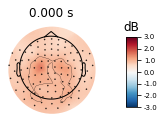

In [15]:
evk_mean = mne.EvokedArray(max_array_sp, temp.info) #make Evoked from np.array
t = np.linspace(0, 0, num=1) 
fig = evk_mean.plot_topomap(times = t, ch_type='planar1', units = 'dB', scalings = 1, show = False, colorbar = True, vmin = -3.0, vmax = 3.0)  
                             

#### same steps for minimums

In [16]:
minimum = np.mean(min_interval_array_self_pace, axis = 0)
min_array = minimum.reshape(102, 1)

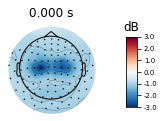

In [17]:
evk_mean = mne.EvokedArray(min_array, temp.info)
fig1 = evk_mean.plot_topomap(times = t, ch_type='planar1', units = 'dB', 
                             scalings = 1, show = False, colorbar = True, vmin = -3.0, vmax = 3.0) 

#### now you can compare received figures

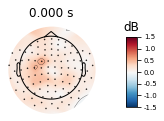

In [18]:
fig_max

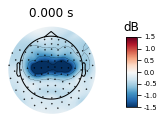

In [19]:
fig_min

#### and save it, if you need

In [32]:
out_path = '/home/........./Desktop/influence_of_the_averaging'

# save obtained figures
fig_min.savefig('/home/.........../Desktop/influence_of_the_averaging/topomaps_selfpased_min_grand_ave_var1.jpeg', dpi = 300)
fig_max.savefig('/home/.........../Desktop/influence_of_the_averaging/topomaps_selfpased_max_grand_ave_var1.jpeg', dpi = 300)

fig1.savefig('/home/........../Desktop/influence_of_the_averaging/topomaps_selfpased_min_var2.jpeg', dpi = 300)
fig.savefig('/home/.........../Desktop/influence_of_the_averaging/topomaps_selfpased_max_var2.jpeg', dpi = 300)



# Time of Extremums for var 2.

if you have a list we name of sensors, you can make table with information about value and time of extrems. If you have no such list, you can make it from .info or ask your friends :)

In [11]:
s = pd.read_csv('/home/............/Desktop/corr_with_behavior/MEM_old/sensors.csv')

maximum_list_sp = max_sp.tolist()
minimum_list_sp = minimum.tolist()

time_max_average_sp = np.mean(max_time_array_self_pace, axis = 0)
time_min_average_sp = np.mean(min_time_array_self_pace, axis = 0)

s['Maximum beta'] = maximum_list_sp
s['Time max'] = time_max_average_sp

s2 = pd.read_csv('/home/............/Desktop/corr_with_behavior/MEM_old/sensors.csv')
s2['Minimum beta'] = minimum_list_sp
s2['Time min'] = time_min_average_sp

sorted_max = s.sort_values(by='Maximum beta', ascending=False)
del sorted_max['Unnamed: 0']
sorted_max.rename(columns = {'Name' : 'Name sensors with max beta'}, inplace = True)

sorted_min = s2.sort_values(by='Minimum beta')
del sorted_min['Unnamed: 0']
sorted_min.rename(columns = {'Name' : 'Name sensors with min beta'}, inplace = True)

Name_max = sorted_max['Name sensors with max beta'].tolist()
time_max = sorted_max['Time max'].tolist()
Name_min = sorted_min['Name sensors with min beta'].tolist()
beta_min = sorted_min['Minimum beta'].tolist()
beta_max = sorted_max['Maximum beta'].tolist()
time_min = sorted_min['Time min'].tolist()

full = pd.DataFrame()
full['Name sensors with max beta'] = Name_max
full['Maximum beta'] = beta_max
full['Time max'] = time_max
full['Name sensors with min beta'] = Name_min
full['Minimum beta'] = beta_min
full['Time min'] = time_min


In [12]:
full.head(10)

,Name sensors with max beta,Maximum beta,Time max,Name sensors with min beta,Minimum beta,Time min
0,MEG0432,1.516890,0.357381,MEG0432,-2.933495,-0.018452
1,MEG0422,1.258567,0.632619,MEG1142,-2.583842,0.186548
2,MEG0442,1.254584,0.338929,MEG0442,-2.349183,0.082024
3,MEG1142,1.241116,0.354881,MEG1132,-2.281236,0.137024
4,MEG1812,1.166958,0.477738,MEG1112,-2.157600,0.161071
5,MEG1132,1.160396,0.162976,MEG0712,-2.124349,0.048095
6,MEG1822,1.136802,0.243929,MEG0722,-2.085438,0.149762
7,MEG1112,1.117317,0.151667,MEG0422,-1.940397,0.101667
8,MEG2222,1.116323,0.534643,MEG1042,-1.785622,0.152500
9,MEG0722,1.104493,0.222976,MEG0632,-1.726443,0.195714


In [13]:
max_ave = np.mean(full['Time max'].tolist())

In [14]:
max_ave

0.34200396825396817

# Enjoy your job ;)